# Exploratory Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

file_path = "../data/processed/cleaned_data.csv"

df = pd.read_csv(file_path)

In [56]:
df[(df["sport"] == "Figure Skating") & (df["season"] == "Summer")]

,id,name,sex,age,height_cm,weight_kg,team,noc,games,year,season,city,sport,event,medal
16898,9087,Kenneth Macdonald Beaumont,M,36.00000,168.20216,59.543651,Great Britain,Gbr,1920 Summer,1924,Summer,Antwerpen,Figure Skating,Figure Skating Men'S Singles,No Medal
16899,9087,Kenneth Macdonald Beaumont,M,36.00000,168.20216,59.543651,Great Britain-3,Gbr,1920 Summer,1924,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,No Medal
16900,9088,Madeleine St. John Beaumont (Brodrick-),F,36.00000,168.20216,59.543651,Great Britain-3,Gbr,1920 Summer,1924,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,No Medal
29497,15308,Isaac Irving Brokaw,M,38.00000,168.20216,59.543651,United States,Usa,1908 Summer,1932,Summer,London,Figure Skating,Figure Skating Men'S Singles,No Medal
30737,15911,Alexia Marie Bryn (Schien-),F,31.00000,168.20216,59.543651,Norway,Nor,1920 Summer,1936,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,Silver
30740,15912,Yngvar Bryn,M,38.00000,168.20216,59.543651,Norway,Nor,1920 Summer,1936,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,Silver
31990,16529,Heinrich Burger,M,26.00000,168.20216,59.543651,Germany,Ger,1908 Summer,1936,Summer,London,Figure Skating,Figure Skating Mixed Pairs,Gold
46895,24288,Arthur Warren Jack Cumming,M,18.00000,168.20216,59.543651,Great Britain,Gbr,1908 Summer,1952,Summer,London,Figure Skating,Figure Skating Men'S Special Figures,Silver
82717,42258,Gillis Emanuel Grafstrm,M,26.00000,168.20216,59.543651,Sweden,Swe,1920 Summer,1968,Summer,Antwerpen,Figure Skating,Figure Skating Men'S Singles,Gold
83520,42681,Dorothy Vernon Greenhough-Smith (Muddock-),F,25.00000,168.20216,59.543651,Great Britain,Gbr,1908 Summer,1968,Summer,London,Figure Skating,Figure Skating Women'S Singles,Bronze


In [40]:
age_by_sport = df.groupby("sport").mean("age")["age"].sort_values(ascending=False)
age_by_sport

sport
Roque                    53.333333
Art Competitions         44.719596
Alpinism                 38.812500
Polo                     35.333333
Equestrianism            34.390831
                           ...    
Diving                   22.481441
Synchronized Swimming    22.366851
Figure Skating           22.232190
Swimming                 20.566803
Rhythmic Gymnastics      18.737082
Name: age, Length: 66, dtype: float64

<Axes: xlabel='sport', ylabel='age'>

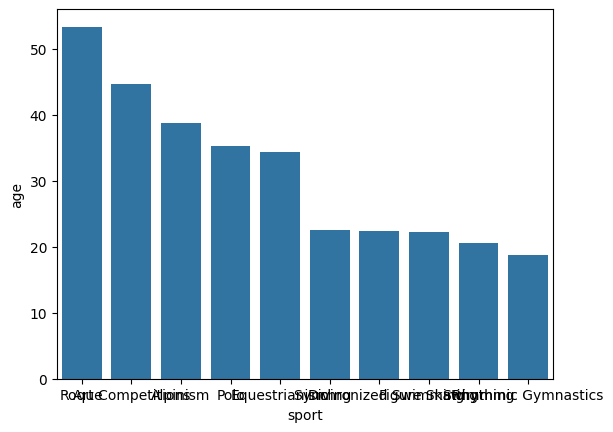

In [48]:
top_5_bottom_5_age_by_sport = pd.concat([age_by_sport.head(), age_by_sport.tail()])

sns.barplot(top_5_bottom_5_age_by_sport)

In [49]:
top_5_bottom_5_age_by_sport

sport
Roque                    53.333333
Art Competitions         44.719596
Alpinism                 38.812500
Polo                     35.333333
Equestrianism            34.390831
Diving                   22.481441
Synchronized Swimming    22.366851
Figure Skating           22.232190
Swimming                 20.566803
Rhythmic Gymnastics      18.737082
Name: age, dtype: float64

In [13]:
df.groupby("sport").max("year")["year"].sort_values(ascending=False)

# About 1/7 of sports were dropped from the Olympics over 70 years ago


sport
Wrestling        2016
Equestrianism    2016
Football         2016
Gymnastics       2016
Handball         2016
                 ... 
Lacrosse         1908
Roque            1904
Croquet          1900
Cricket          1900
Basque Pelota    1900
Name: year, Length: 66, dtype: int64

In [14]:
df["year"].min()

np.int64(1896)

In [17]:
first_year_per_sport = df.groupby("sport").min("year")["year"]
last_year_per_sport = df.groupby("sport").max("year")["year"]
duration_per_sport = (last_year_per_sport - first_year_per_sport).sort_values(ascending=False)
duration_per_sport

# Some sports have only been played once
# Historic sports: 
    # Wrestling, Weightlifting, Shooting, Fencing Cycling, Gymnastics, Swimming, Athletics, etc
    # (Tennis not continuous, upon research)

# Idea: investigate Olympic record progression across historic sports 

sport
Wrestling        120
Weightlifting    120
Shooting         120
Tennis           120
Fencing          120
                ... 
Jeu De Paume       0
Croquet            0
Cricket            0
Basque Pelota      0
Aeronautics        0
Name: year, Length: 66, dtype: int64

In [39]:
years = df["year"].unique()

for year in range(1896, 2020, 4):
    if year not in years:
        print(f"Year missed: {year}")

for year in years:
    if year % 2 != 0:
        print(f"Odd year: {year}")

for i in range(1, len(years)):
    if years[i] - years[i - 1] != 4:
        print(f"Gap devation between: {years[i - 1]} and {years[i]}")

# The gap deviations are a mix of delayed/cancelled winter/summer Olympics and the eventual change of winter Olympics to 2 years apart from summer Olympics 

Year missed: 1916
Year missed: 1940
Year missed: 1944
Gap devation between: 1904 and 1906
Gap devation between: 1906 and 1908
Gap devation between: 1912 and 1920
Gap devation between: 1936 and 1948
Gap devation between: 1992 and 1994
Gap devation between: 1994 and 1996
Gap devation between: 1996 and 1998
Gap devation between: 1998 and 2000
Gap devation between: 2000 and 2002
Gap devation between: 2002 and 2004
Gap devation between: 2004 and 2006
Gap devation between: 2006 and 2008
Gap devation between: 2008 and 2010
Gap devation between: 2010 and 2012
Gap devation between: 2012 and 2014
Gap devation between: 2014 and 2016


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         269731 non-null  int64  
 1   name       269731 non-null  object 
 2   sex        269731 non-null  object 
 3   age        269731 non-null  float64
 4   height_cm  269632 non-null  float64
 5   weight_kg  269514 non-null  float64
 6   team       269731 non-null  object 
 7   noc        269731 non-null  object 
 8   games      269731 non-null  object 
 9   year       269731 non-null  int64  
 10  season     269731 non-null  object 
 11  city       269731 non-null  object 
 12  sport      269731 non-null  object 
 13  event      269731 non-null  object 
 14  medal      269731 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [53]:
df["season"].unique()

array(['Summer', 'Winter'], dtype=object)

In [ ]:
summer = df[df["season"] == "Summer"]
athletics = summer[summer["sport"] == "Athletics"]
